2602160750 - Bryan Orville Audric

#Importing Library

In [121]:
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

#Loading Dataset

In [363]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/creditcard.csv')

In [364]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Dataset Information

In [365]:
data.shape

(284807, 31)

In [366]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [367]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [368]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [369]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#Looking for outlier

<Axes: ylabel='Amount'>

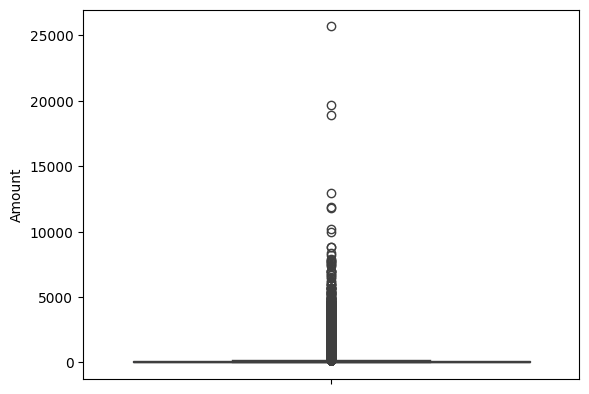

In [370]:
sns.boxplot(data=data['Amount'])

<Axes: ylabel='Time'>

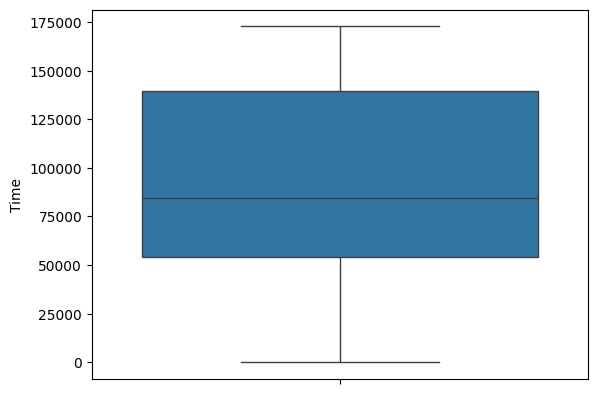

In [371]:
sns.boxplot(data=data['Time'])

#Preprocessing

Removing outlier for 'Amount' column

In [372]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)

IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(data['Amount']<=Lower)[0]
Upper_array = np.where(data['Amount']>=Upper)[0]

data.drop(index=Lower_array,inplace=True)
data = data.reset_index(drop=True)
data.drop(index=Upper_array,inplace=True)

data = data.reset_index(drop=True)

In [373]:
data.shape

(252903, 31)

Balancing dataset using under sampling method

In [374]:
RUS = RandomUnderSampler(random_state=42)

x = data.drop(columns=['Class'])
y = data['Class']

x_resampled,y_resampled = RUS.fit_resample(x,y)

data = pd.concat([x_resampled, y_resampled], axis=1, join='inner')

In [375]:
data['Class'].value_counts()

Class
0    401
1    401
Name: count, dtype: int64

Standard Scaling

In [376]:
Scaler = StandardScaler()
copydf = data.copy()
copydf = Scaler.fit_transform(copydf)
copydf = pd.DataFrame(copydf,columns=[data.columns])

In [377]:
data['Amount'] = copydf['Amount']
data['Time'] = copydf['Time']

In [378]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.295604,-5.191843,-6.039965,0.865522,-0.562063,2.294757,-1.696625,-0.338370,-0.568119,0.325151,...,-1.080361,-0.075494,3.078991,-0.452594,0.476100,-0.442401,0.195117,-0.073231,2.115072,0
1,1.029081,2.351215,-1.296174,-1.604668,-1.670318,-0.637376,-0.550998,-0.738029,-0.289231,-1.290700,...,-0.449116,-0.787406,0.175604,-1.106403,-0.071973,-0.259074,-0.008009,-0.064414,-0.094386,0
2,-1.069503,-1.470854,-0.049786,0.622394,-0.741008,0.197486,-1.294339,0.163824,0.431150,-0.201980,...,-0.097098,-0.848939,0.097470,-0.122828,0.004656,0.718928,0.019458,-0.137003,0.876944,0
3,-0.603097,1.098775,-0.342989,0.503645,0.433025,-0.586118,0.094543,-0.376203,0.224805,0.624300,...,-0.014189,0.089700,-0.074468,0.064640,0.386616,0.684737,-0.033526,-0.004305,0.041275,0
4,-0.060518,-1.093167,0.662789,2.754947,-0.369104,0.166061,0.504757,0.253109,0.054024,0.348908,...,0.271651,0.878964,-0.407479,-0.452460,0.388412,-0.371429,-0.342776,-0.116993,-0.535508,0


Splitting feature and label

In [379]:
x = data.drop(columns=['Class'])
y = data['Class']

#PCA from Sklearn

In [380]:
nums = np.arange(31)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(x)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

In [381]:
print(var_ratio)

[0.0, 0.6716860143393815, 0.7785346286117896, 0.8593460014714907, 0.8967910303816063, 0.9324593064923771, 0.9415838365876369, 0.9481559022954067, 0.9542956298505579, 0.9596445306566809, 0.9647917966978704, 0.9687899407700336, 0.9725898596336889, 0.9759776088444876, 0.9790079263569792, 0.981682013352955, 0.9842681513303809, 0.9864995100191919, 0.9884141112060721, 0.9902892171913682, 0.9920430913982303, 0.9936196933960124, 0.9948262549274933, 0.99585175717398, 0.9967936501230783, 0.9976109521934122, 0.9983231930437895, 0.9989515148896223, 0.999413519731476, 0.9998310847426435, 0.9999999999999997]


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

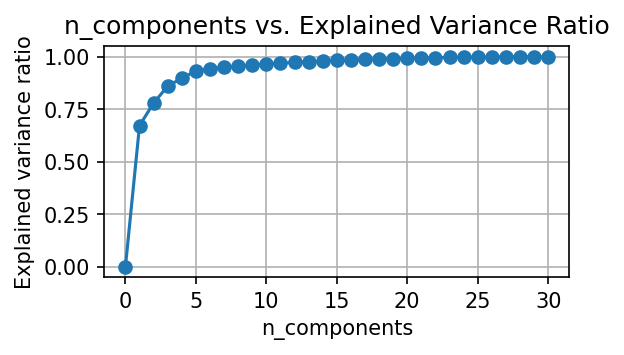

In [382]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

Since 5 components already give 0.93 variance, 5 components will be used

In [383]:
pca = PCA(n_components=5)
pca.fit(x)
sum(pca.explained_variance_ratio_)

0.9324593064933445

In [384]:
x_pca_sklearn = pca.fit_transform(x)

In [385]:
x_pca_sklearn.shape

(802, 5)

Splitting data into training set and testing set

In [386]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_sklearn,y,test_size=0.3,random_state=42)

##Logistic Regression

In [387]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)

In [388]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.99      0.87      0.93       116

    accuracy                           0.93       241
   macro avg       0.94      0.93      0.93       241
weighted avg       0.94      0.93      0.93       241



#PCA scratch

In [389]:
mean = np.mean(x, axis=0)

X_centered = x - mean

Cx = np.cov(X_centered.T)

eig_vals, eig_vecs = np.linalg.eig(Cx)

sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]

explained_variance_ratio = eig_vals_sorted / np.sum(eig_vals_sorted)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

num_components = np.argmax(cumulative_explained_variance >= 0.9) + 1

W = eig_vecs_sorted[:, :num_components]

x_pca_scratch = np.dot(X_centered, W)

x_pca_scratch


array([[ -9.86387531,   1.15768161,  -1.56363744,  -2.01401153,
          0.17630321],
       [-10.12888622,   0.98015914,  -1.49734173,  -1.2599124 ,
          0.60646813],
       [ -9.47817042,   1.27315986,  -2.6199959 ,  -1.64070703,
          0.14526845],
       ...,
       [ -1.88047941,  -2.44457966,   2.25355811,   1.6551916 ,
          0.50879825],
       [ -1.85912534,  -1.76936905,   0.57982192,  -1.75341273,
          0.52503722],
       [ -9.66126729,   0.53786721,  -0.749876  ,   2.07278987,
          0.12653581]])

In [390]:
x_pca_scratch.shape

(802, 5)

Splitting Dataset into training set and testing set

In [391]:
x_train,x_test,y_train,y_test = train_test_split(x_pca_scratch,y,test_size=0.3,random_state=42)

##Logistic Regression

In [392]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)

In [393]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       125
           1       0.99      0.87      0.93       116

    accuracy                           0.93       241
   macro avg       0.94      0.93      0.93       241
weighted avg       0.94      0.93      0.93       241



#Linear Discriminant Analysis from Sklearn

LDA taken from sklearn doesnot allow number of components to be larger than number of classes - 1 and since number of classes are 2, number of components can only be set to 1

In [394]:
lda = LDA(n_components=1)
x_lda_sklearn = lda.fit_transform(x,y)

In [395]:
x = pd.DataFrame(x_lda_sklearn,columns=['x'])
plotdata = pd.concat([x,y],axis=1)

In [396]:
plotdata.shape

(802, 2)

<Axes: xlabel='x', ylabel='Class'>

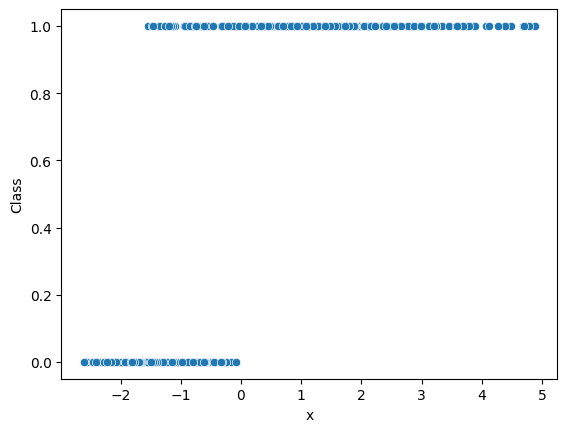

In [397]:
sns.scatterplot(data=plotdata,x = 'x', y = 'Class')

In [398]:
x_train,x_test,y_train,y_test = train_test_split(x_lda_sklearn,y,test_size=0.3,random_state=42)

##Logistic Regression

In [399]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)

In [400]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       125
           1       0.96      0.85      0.90       116

    accuracy                           0.91       241
   macro avg       0.92      0.91      0.91       241
weighted avg       0.92      0.91      0.91       241



#Insight

There are almost no difference in accuracy, recall or F1 score of scratch pca and sklearn pca, with an accuracy of 93%. Since LDA from sklearn cant used more than 1 components as stated previously because it requires the components number cannot be greater than number of class - 1, features from LDA produces relatively lower accuracy of 91%